In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from PIL import Image

In [31]:
"""
Creates df with following columns:
    prime: prime that data collection was for 
    pos_error: max(S(x) - Fourier(x))
    neg_error: min(S(x) - Fourier(x))
    x_pos_error: List[x] s.t. S(x) - Fourier(x) == pos_error
    x_neg_error: List[x] s.t. S(x) - Fourier(x) == neg_error
    max_error: max(pos_error, -1 * neg_error)
    x_max_error: x s.t. |S(x) - Fourier(x)| == max_error
    max_error_ind: 1 iff pos_error == max_error, 0 o.w.
    mag_diff: |pos_error + neg_error| 
"""
path = os.path.join("/Users", "jcheigh", 'Thesis')
csv_name = f"{path}/data.csv"

df = pd.read_csv(csv_name)

df['max_error'] = df.apply(lambda row: max(row['pos_error'], -1 * row['neg_error']), axis=1)
df['max_error_ind'] = np.where(df['max_error'] == df['pos_error'], 1, 0)
df["x_max_error"] = np.where(df["max_error_ind"] == 1, df["x_pos_error"], df["x_neg_error"])
df["mag_diff"] = df.apply(lambda row : abs(row["pos_error"] + row["neg_error"]), axis = 1)
df = df.sort_values("prime")

df

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
78,101359,27.71,-17.25,46971,31319,27.71,1,46971,10.46
123,102653,23.70,-23.62,51680,50970,23.70,1,51680,0.08
9,102859,24.54,-22.80,15369,71642,24.54,1,15369,1.74
50,104479,17.74,-27.27,61158,91736,27.27,0,91736,9.53
4,104759,51.11,-0.00,54804,104757,51.11,1,54804,51.11
...,...,...,...,...,...,...,...,...,...
20,195457,33.37,-33.36,73295,122159,33.37,1,73295,0.01
88,196579,30.61,-33.39,94921,159127,33.39,0,159127,2.78
19,197551,28.33,-33.93,88599,115794,33.93,0,115794,5.60
71,199499,46.06,-17.20,99748,11467,46.06,1,99748,28.86


In [32]:
"""
Helpers:
    names maps col name to nicely formatted name
    plot_diff_lst plots the difference lst 
    is_cat maps to True iff feat is categorical
"""

names = {
    "prime"          : "Prime",
    "pos_error"      : "Max Pos. Error",
    "neg_error"      : "Max Neg. Error",
    "x_pos_error"    : "Index of Pos. Error",
    "x_neg_error"    : "Index of Neg. Error",
    "max_error"      : "Max Error Mag.",
    "max_error_ind"  : "Error Indicator",
    "x_max_error"    : "Index of Error Mag.",
    "mag_diff"       : "Difference in Errors"
}

def plot_diff_lst(prime: int):
    plot_path = os.path.join("/Users", "jcheigh", "Thesis", "Plots")
    plot_path = f"{plot_path}/Prime = {prime} Difference Plot.png"
    
    try:
        img = Image.open(plot_path)
        plt.figure(figsize = (20,10))
        plt.imshow(img)
        plt.axis('off')  # Turn off axis
        plt.show()
    except Exception:
        print(f"Prime = {prime} hasn't been analyzed yet")

is_cat = lambda feat : True if feat == 'max_error_ind' else False

In [97]:
### plot functionality 

def histplot(x, df = df, bins = 30, xlabel = None, title = None):
    # distribution of numerical
    plt.figure(figsize = (10,8))
    p = sns.histplot(x = x, data = df, bins = bins, 
                     kde = True, fill = True, 
                     edgecolor = "black", linewidth = 3
                    )

    p.axes.lines[0].set_color("orange")
    
    if xlabel is None:
        xlabel = names[x]
        
    if title is None:
        title = f"{xlabel} Distribution"
    
    plt.ylabel("Count", fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20)
    plt.title(title, fontsize = 25)

    plt.show()
    
    
def countplot(x, df = df, xlabel = None, title = None):
    # distribution of categorical
    plt.figure(figsize = (10,8))
    p = sns.countplot(x = x, data = df,
            order = df[x].value_counts().index)
    
    for container in p.containers: 
        p.bar_label(container, label_type = "center", padding = 6, size = 15, color = "black", 
                    bbox={"boxstyle": "round", "pad": 0.4,"facecolor": "#e0b583", 
                          "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})
        
    if xlabel is None:
        xlabel = names[x]
    
    if title is None:
        title = f"Breakdown of {xlabel}"
    
    p.axes.set_title(title, fontsize = 25)
    p.axes.set_ylabel("Count",fontsize = 20)
    p.axes.set_xlabel(xlabel, fontsize = 20) 

    plt.show()  
    
def violinplot(x, y = None, df = df, xlabel = None, ylabel = None, title = None): 
    # x is categorical, y is numerical 
    plt.figure(figsize = (10, 8))
    
    if y is None:
        y = "prime"
        
    p = sns.violinplot(x = x, y = y, data = df,
                       order = df[x].value_counts().index,
                       linewidth = 3, edgecolor = "black")

    if xlabel is None:
        xlabel = names[x]
    
    if ylabel is None:
        ylabel = names[y]
    
    if title is None:
        title = f"{ylabel} by {xlabel}"
    
    p.axes.set_title(title, fontsize = 25)
    p.axes.set_xlabel(xlabel, fontsize = 20)
    p.axes.set_ylabel(ylabel, fontsize = 20)
    
    plt.show()

def kdeplot(x, y = None, data = df, xlabel = None, ylabel = None, title = None):
    # both numeric
    plt.figure(figsize = (10,8))
    
    if y is None:
        y = "prime"
        
    p = sns.kdeplot(x = x, y = y, data = df, fill = True)
    
    if xlabel is None:
        xlabel = names[x]
    
    if ylabel is None:
        ylabel = names[y]
    
    if title is None:
        title = f"{ylabel} by {xlabel}"
        
    p.axes.set_title(title ,fontsize=25)
    plt.ylabel(ylabel, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20)
    
    plt.show()
    
def scatter(y, x = None, df = df, y_trans = "None", xlabel = None, ylabel = None, title = None):
    # both numeric
    plt.figure(figsize = (10, 8))
    sns.set(style='ticks')
    sns.set_context("poster")

    if x is None:
        x = "prime"
    
    if xlabel is None:
        xlabel = names[x]
    
    if ylabel is None:
        ylabel = names[y]
    
    if title is None:
        title = f"{ylabel} by {xlabel} with Transformation = {y_trans.title()}"
    
    y = df[y]
    x = df[x]
    
    if y_trans == "log":
        y = np.log(y)
    
    if y_trans == 'log_squared':
        y = np.square(np.log(y))
        
    p = sns.regplot(x = x, y = y)
        
    p.axes.set_title(title, fontsize=25)
    plt.ylabel(ylabel, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 20)

    plt.show()

In [78]:
df.head()

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
78,101359,27.71,-17.25,46971,31319,27.71,1,46971,10.46
123,102653,23.70,-23.62,51680,50970,23.70,1,51680,0.08
9,102859,24.54,-22.80,15369,71642,24.54,1,15369,1.74
50,104479,17.74,-27.27,61158,91736,27.27,0,91736,9.53
4,104759,51.11,-0.00,54804,104757,51.11,1,54804,51.11


In [80]:
df.tail()

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
20,195457,33.37,-33.36,73295,122159,33.37,1,73295,0.01
88,196579,30.61,-33.39,94921,159127,33.39,0,159127,2.78
19,197551,28.33,-33.93,88599,115794,33.93,0,115794,5.60
71,199499,46.06,-17.20,99748,11467,46.06,1,99748,28.86
131,1020389,80.51,-80.51,255096,765290,80.51,1,255096,0.00


In [81]:
df.describe()

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
count,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,1.468525e+05,31.832045,-23.832576,70549.325758,84742.871212,32.704773,0.681818,69404.613636,9.744924
std,8.170733e+04,11.686851,10.069315,46752.751619,73855.668709,11.243162,0.467545,45988.304878,17.125240
min,1.013590e+05,10.210000,-80.510000,99.000000,663.000000,21.350000,0.000000,99.000000,0.000000
25%,1.157350e+05,25.365000,-28.765000,35953.750000,49605.250000,26.287500,0.000000,34024.000000,0.027500
50%,1.325030e+05,27.990000,-25.185000,69667.500000,81427.500000,28.860000,1.000000,65467.000000,0.370000
75%,1.642175e+05,34.277500,-21.962500,101411.500000,107726.500000,35.037500,1.000000,102269.500000,11.577500
max,1.020389e+06,96.080000,-0.000000,255096.000000,765290.000000,96.080000,1.000000,255096.000000,96.080000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 78 to 131
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prime          132 non-null    int64  
 1   pos_error      132 non-null    float64
 2   neg_error      132 non-null    float64
 3   x_pos_error    132 non-null    int64  
 4   x_neg_error    132 non-null    int64  
 5   max_error      132 non-null    float64
 6   max_error_ind  132 non-null    int64  
 7   x_max_error    132 non-null    int64  
 8   mag_diff       132 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 14.4 KB


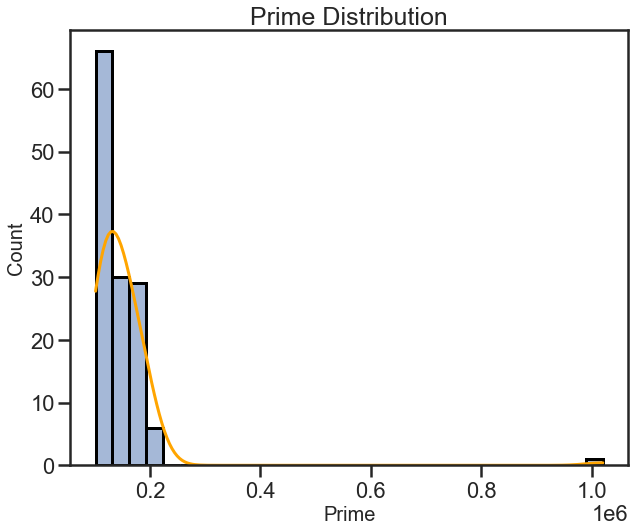

In [34]:
histplot("prime")

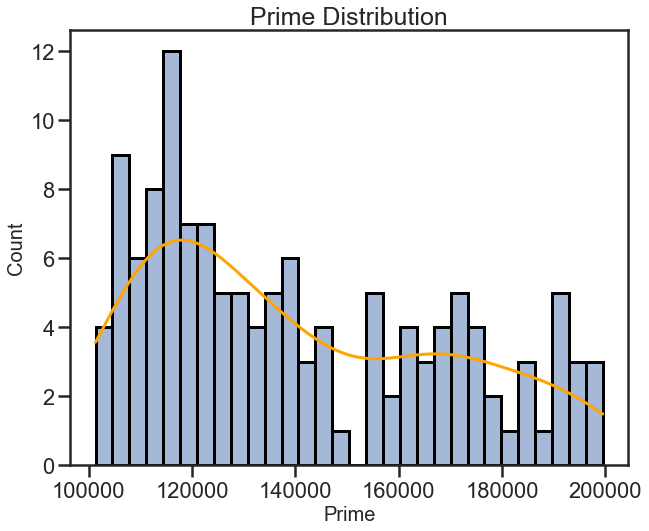

In [35]:
histplot("prime", df[df["prime"] <= 200000])

Prime Distribution: <br>
- Ideally this would be uniform
- Due to prime number theorem it should theoretically be slighly decreasing
- Due to multiprocessing and fact that smaller primes tend to process, it decreases more
- Overall not a huge deal 

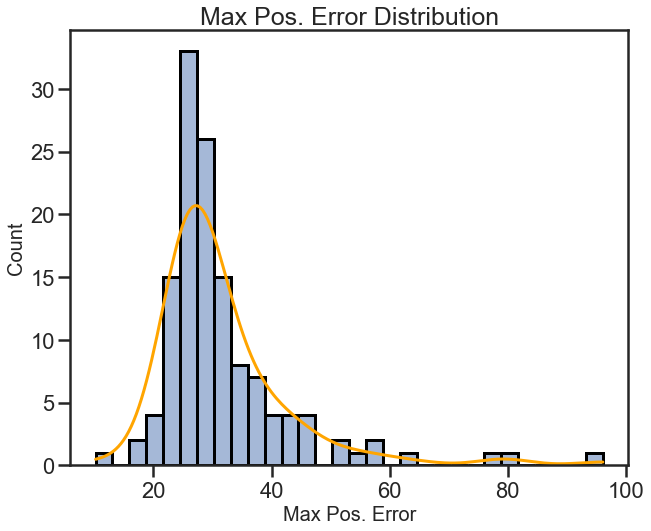

In [36]:
histplot("pos_error")

Max Positive Error Distribution: <br>
- A few outliers on the positive side
- On negative side the min is guaranteed 0 (since diff @ 0 == 0)
- Besides this the distribution is pretty symmetrical and almost normal-like
- Interestingly even the 1 million datapoint isn't the rightmost point

In [38]:
print(f"Max Positive Error Mean = {round(df['pos_error'].mean(), 2)}")
print(f"Max Positive Error Std. Dev. = {round(df['pos_error'].std(), 2)}")

Max Positive Error Mean = 31.83
Max Positive Error Std. Dev. = 11.69


Mean is 31.46 and standard deviation is 10.92. Given < 150 datapoints this is not normal as the observations in the 60s to 100 wouldn't be possible. 

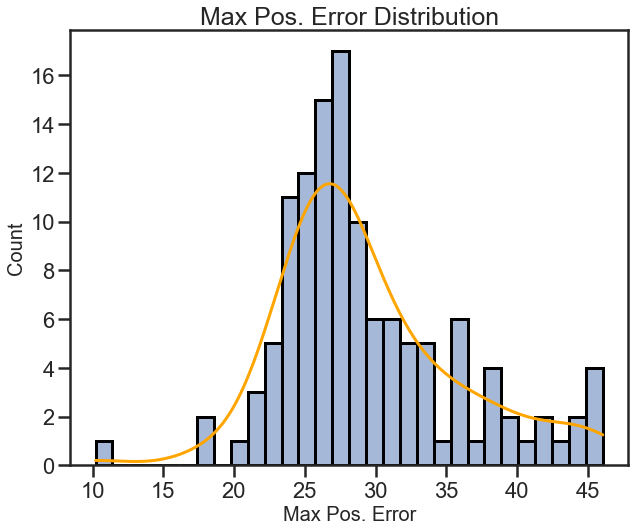

In [39]:
histplot("pos_error", df[(df["pos_error"] < 50)])

The min max positive error is around 10

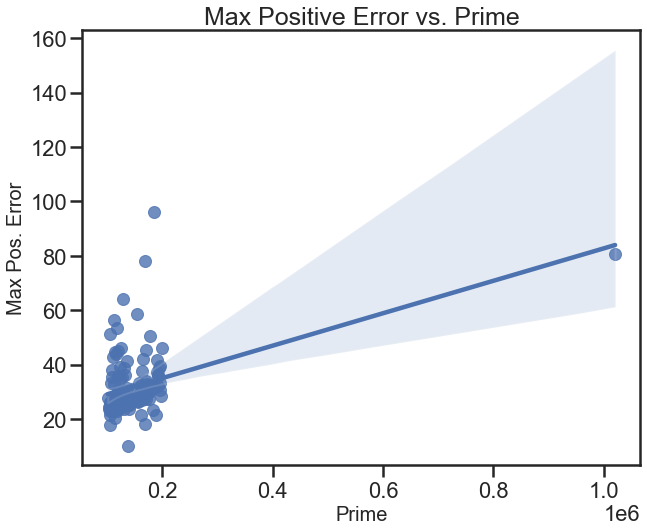

In [40]:
scatter("pos_error", title = "Max Positive Error vs. Prime")

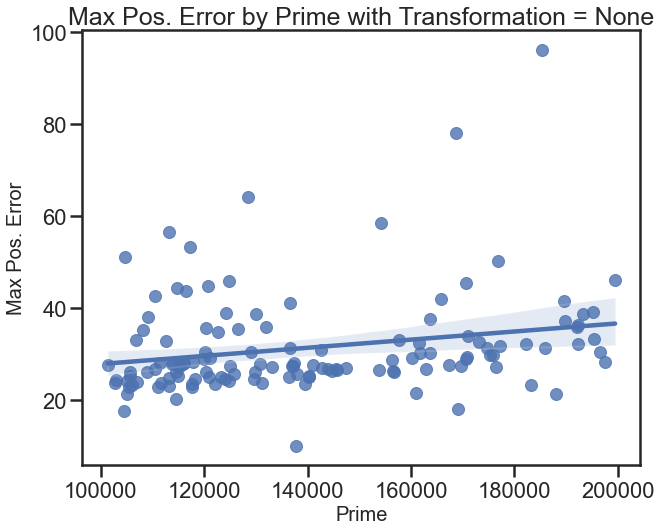

In [41]:
scatter("pos_error", df = df[df["prime"] <= 200000])

Positive correlation

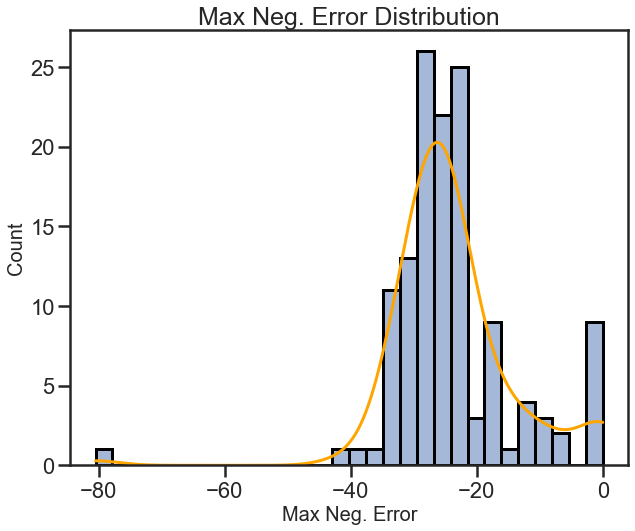

In [43]:
histplot('neg_error')

Bears some resemblance to pos error except obviously flipped. Here the -80 outlier is due to the 1 million point so not as many outliers on the negative side.

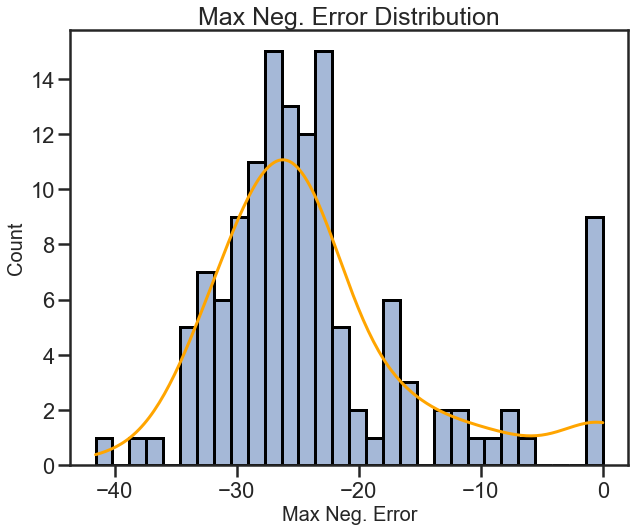

In [44]:
histplot("neg_error", df = df[df["prime"] < 200000])

But, there are some points with virtually no errors that were negative. Let's look at the diff plots for these

In [47]:
df_pos = df[df["neg_error"] > -5]

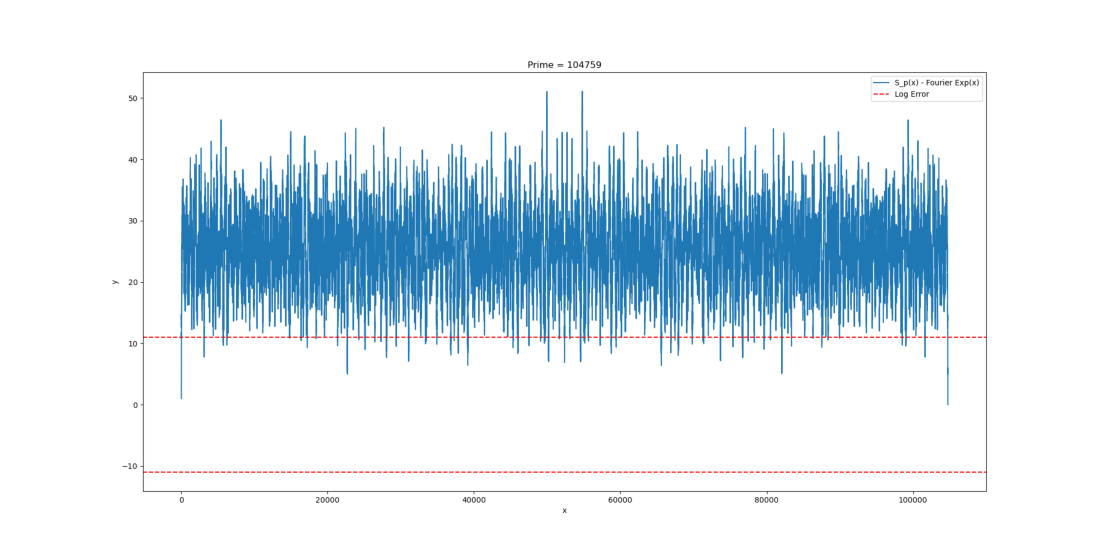

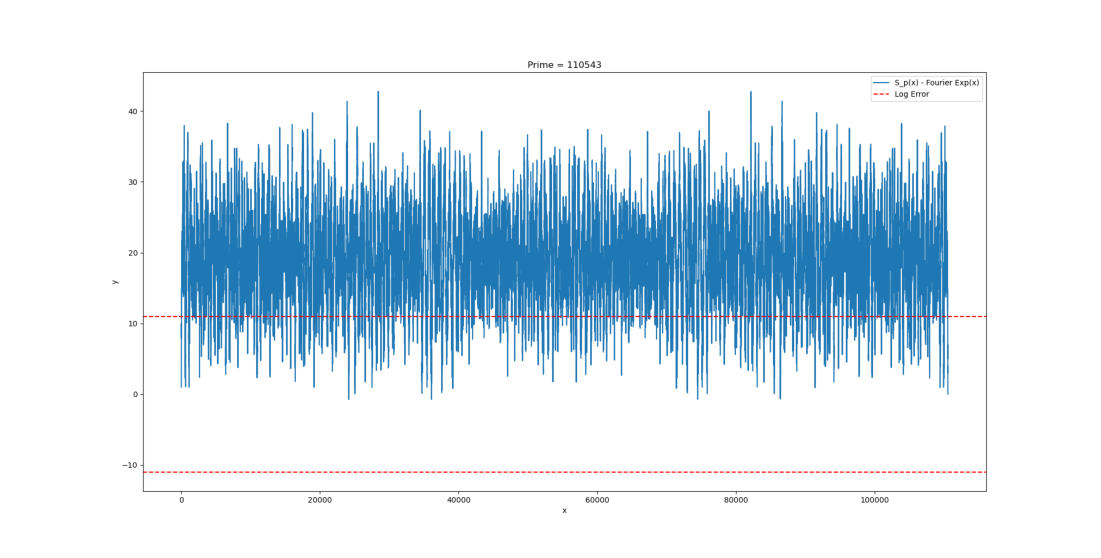

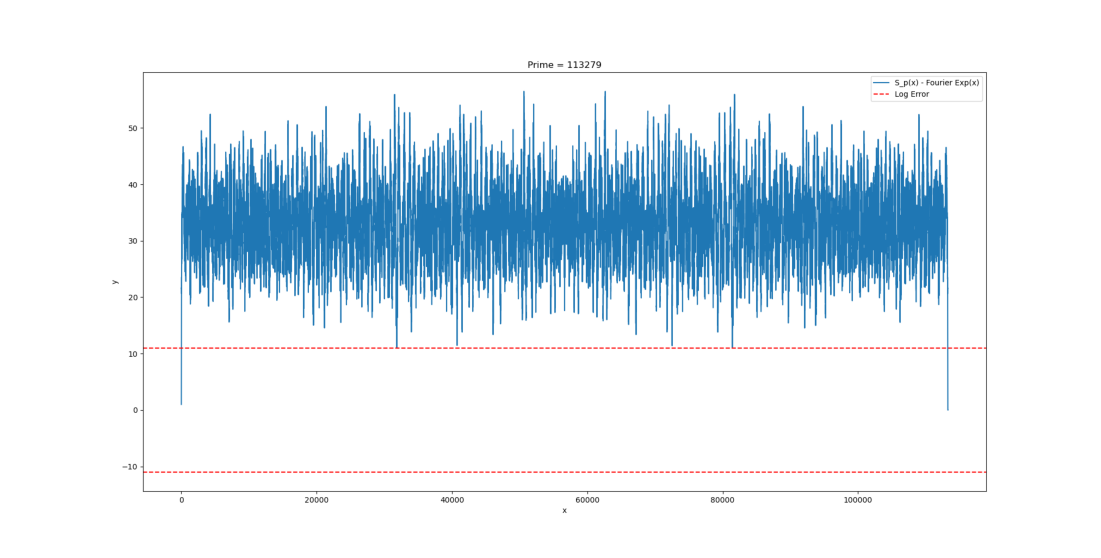

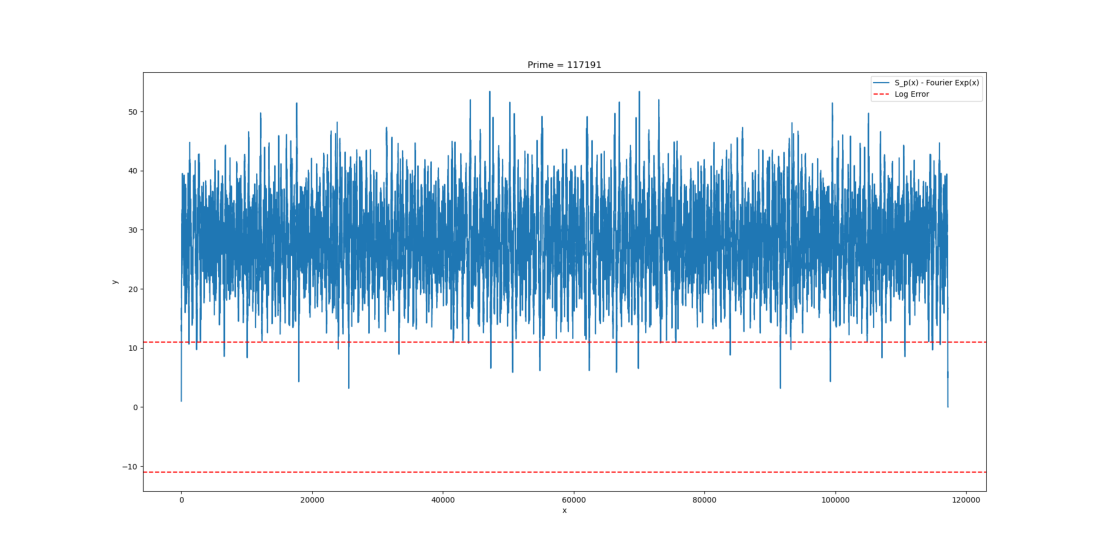

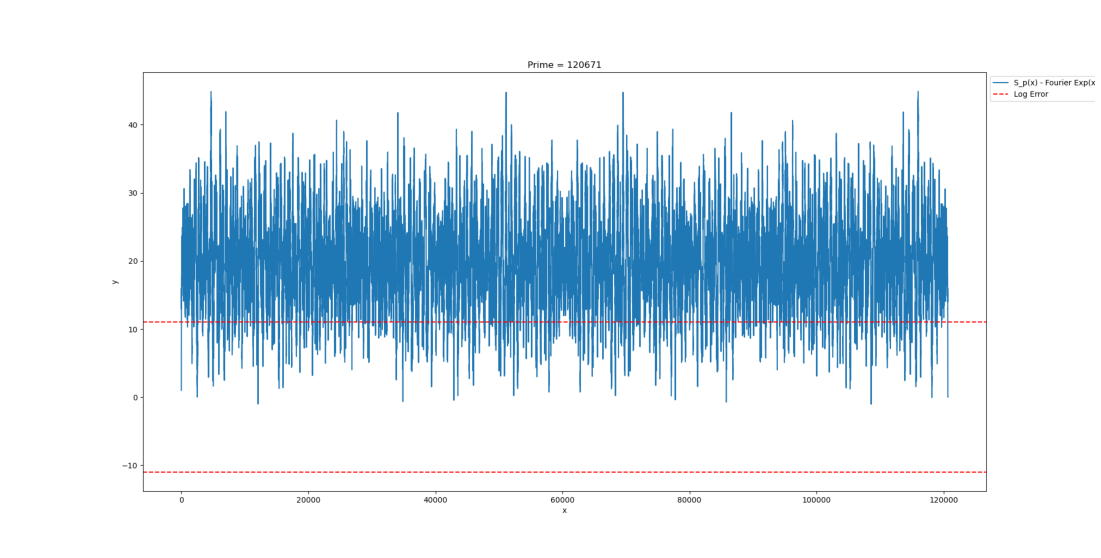

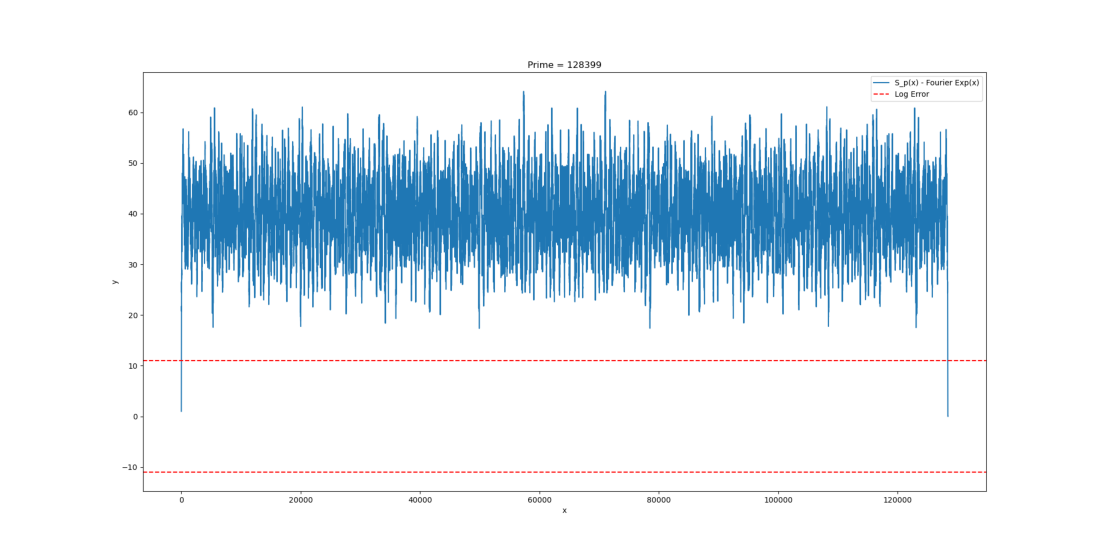

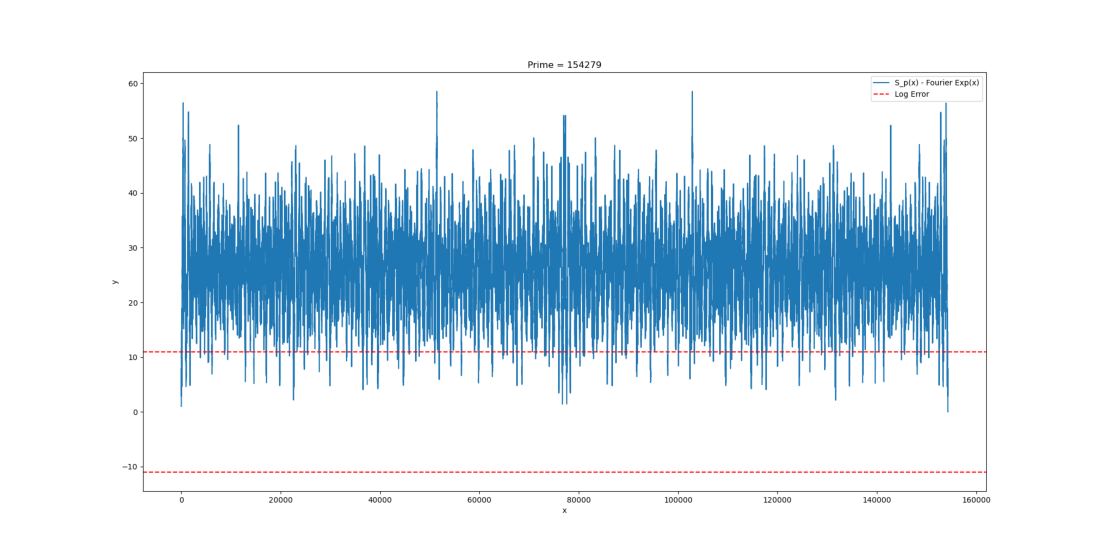

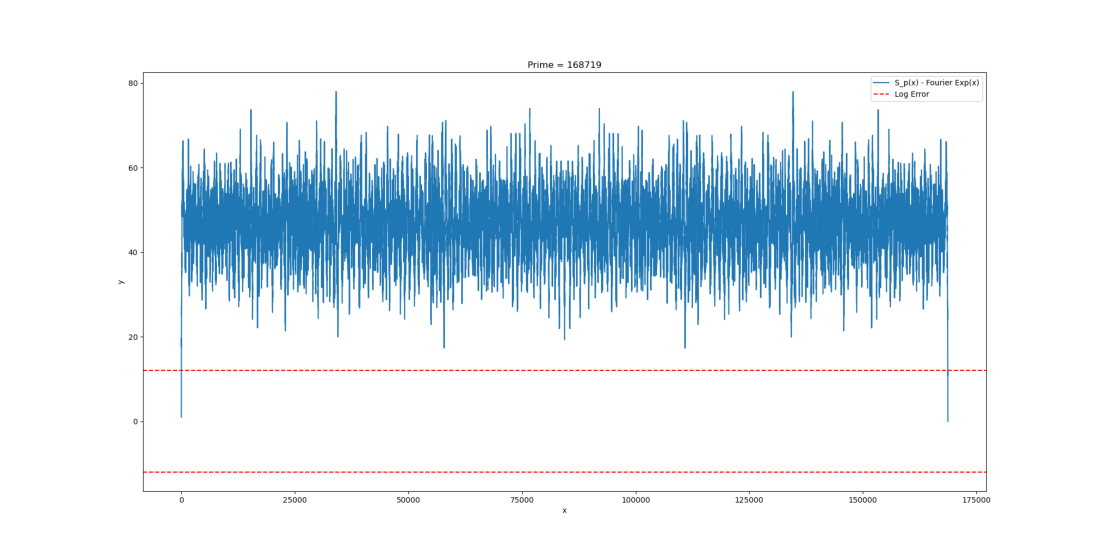

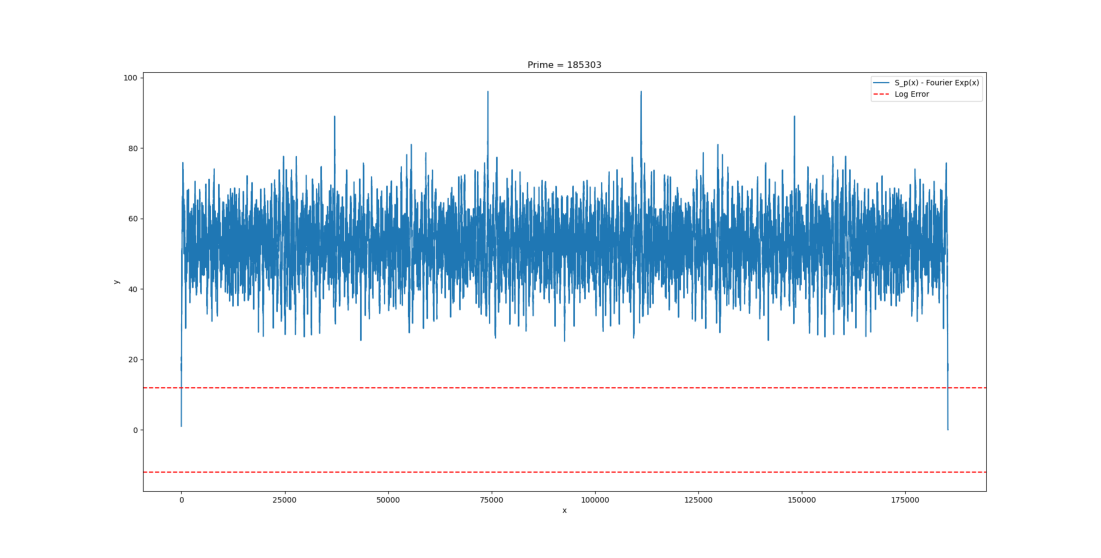

In [51]:
for prime in df_pos["prime"].values:
    plot_diff_lst(prime)

These are weird. The entire plot is pretty much above the error zone.

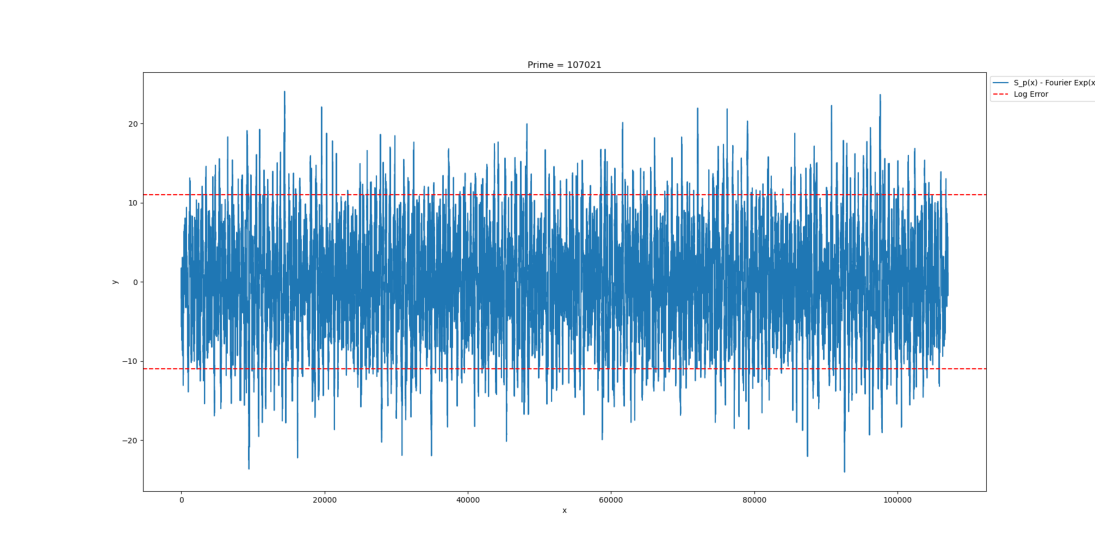

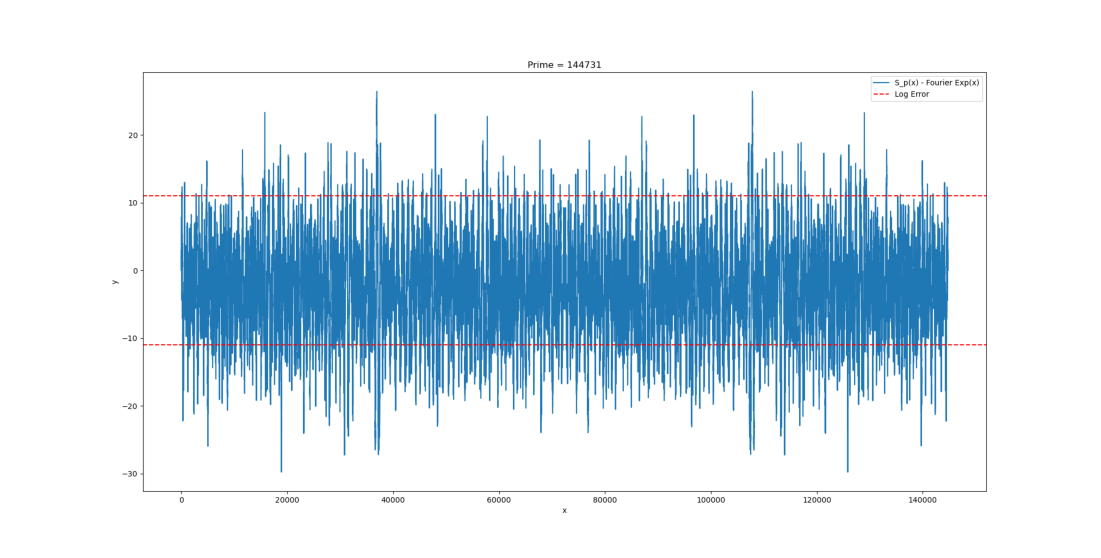

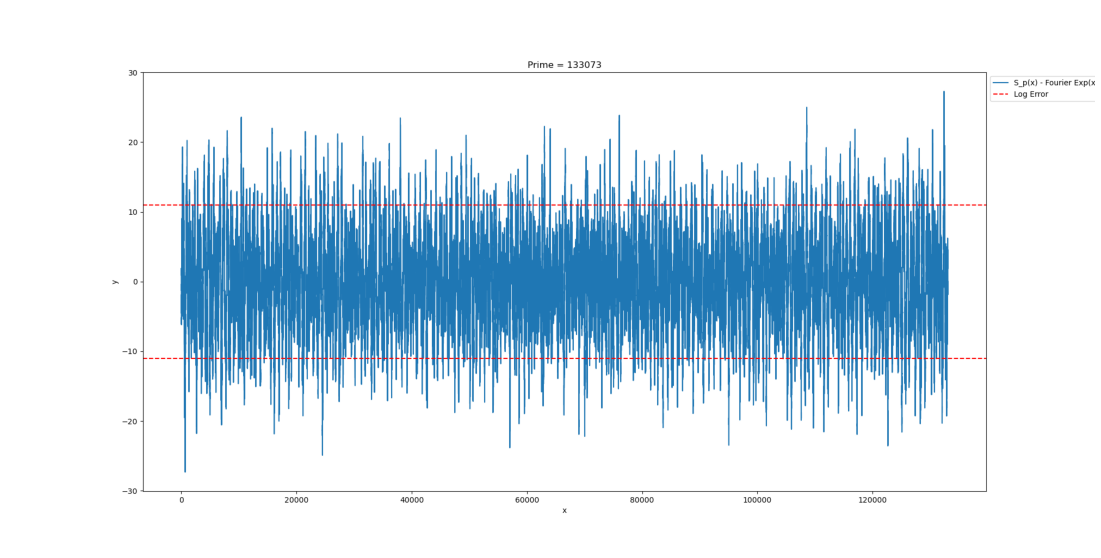

In [57]:
for prime in random.choices(list(df["prime"].values), k = 3):
    plot_diff_lst(prime)

Looking at these "normal" plots, we see the "weird" plots are very much just translated up. Let's see if there's a trend within these "weird" plots.

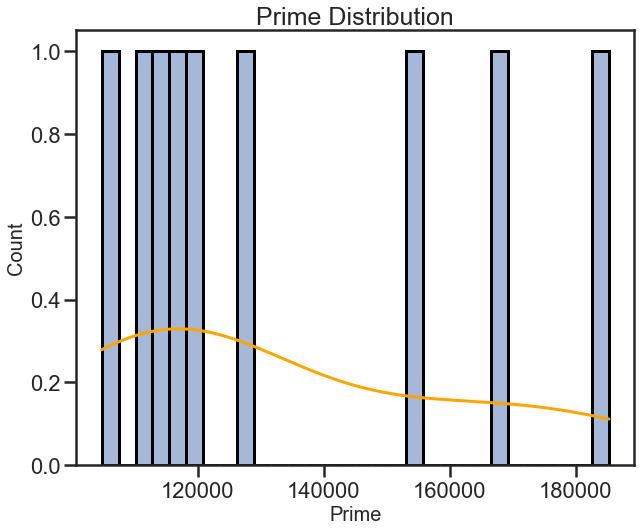

In [58]:
histplot("prime", df = df_pos)

This is similar to the initial distribution of prime, so no trend like higher primes are more likely (at least in this range)

In [59]:
df_pos

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
4,104759,51.11,-0.00,54804,104757,51.11,1,54804,51.11
90,110543,42.79,-0.73,28393,36066,42.79,1,28393,42.06
52,113279,56.49,-0.00,50628,113277,56.49,1,50628,56.49
62,117191,53.42,-0.00,47164,117189,53.42,1,47164,53.42
113,120671,44.90,-1.03,115994,108589,44.90,1,115994,43.87
3,128399,64.16,-0.00,71053,128397,64.16,1,71053,64.16
48,154279,58.56,-0.00,51425,154277,58.56,1,51425,58.56
80,168719,78.03,-0.00,34053,168717,78.03,1,34053,78.03
35,185303,96.08,-0.00,111180,185301,96.08,1,111180,96.08


In [60]:
df[df["pos_error"] >= 50]

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
4,104759,51.11,-0.00,54804,104757,51.11,1,54804,51.11
52,113279,56.49,-0.00,50628,113277,56.49,1,50628,56.49
62,117191,53.42,-0.00,47164,117189,53.42,1,47164,53.42
3,128399,64.16,-0.00,71053,128397,64.16,1,71053,64.16
48,154279,58.56,-0.00,51425,154277,58.56,1,51425,58.56
80,168719,78.03,-0.00,34053,168717,78.03,1,34053,78.03
97,176899,50.33,-32.40,70758,141518,50.33,1,70758,17.93
35,185303,96.08,-0.00,111180,185301,96.08,1,111180,96.08
131,1020389,80.51,-80.51,255096,765290,80.51,1,255096,0.00


Here I'm checking the overlap between the most positive error and the least negative error. <br>
- There's strong overlap with the following exceptions:
- datapoint 131: this is the 1 million prime
- datapoints 113 and 90: these are the two with small negative error and also have large (>40) pos error
- datapoint 97: this one is a bit weird as it has high pos error and above average negative error

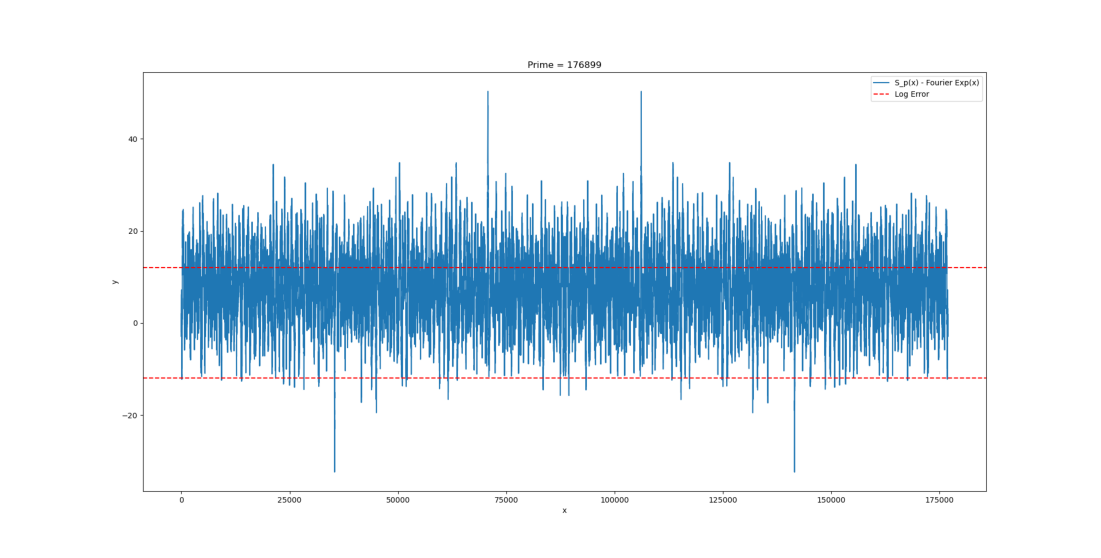

In [63]:
plot_diff_lst(176899)

Looking at the plot more seriosly we just have a "normal" plot with a few major exceptions, in both the positive and negative direction. Another very interesting thing I see here is symmetry. This is something to definitely explore later.

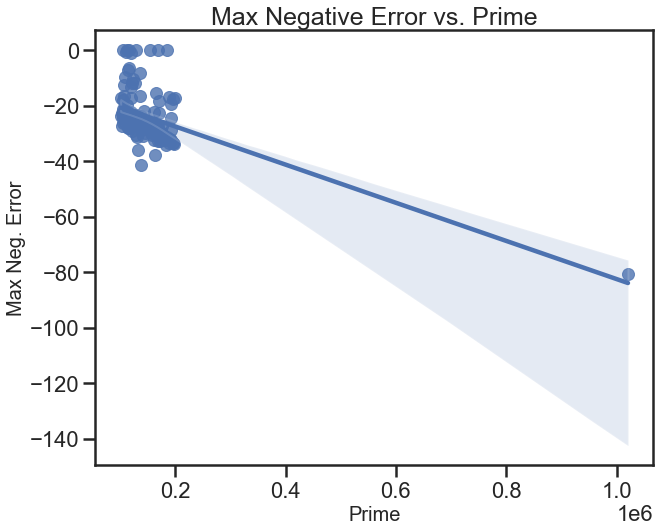

In [66]:
scatter("neg_error", title = "Max Negative Error vs. Prime")

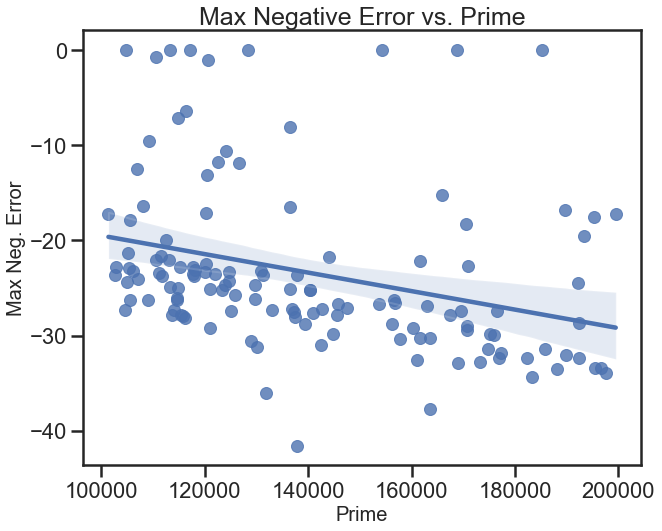

In [67]:
scatter("neg_error", df = df[df['prime'] < 200000], title = "Max Negative Error vs. Prime")

This has a more straightforward decreasing relationship than the positive

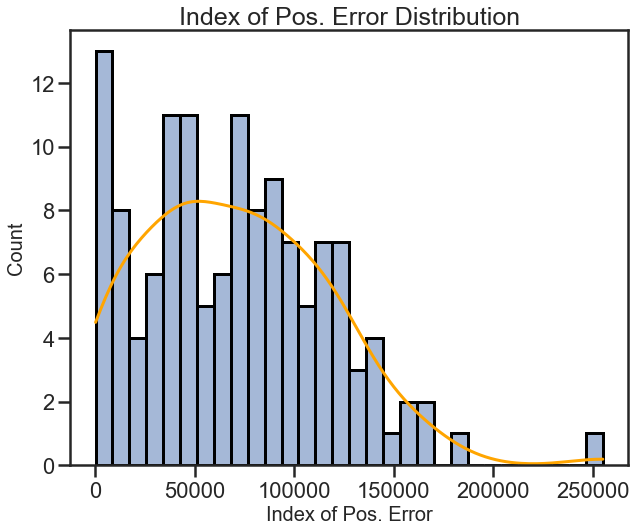

In [69]:
histplot("x_pos_error")

It's hard to decipher what this really means. What's really important here are features as a percentage of prime (i.e. what is x_pos_index / prime). I'll do this later but let's just look at these really quickly

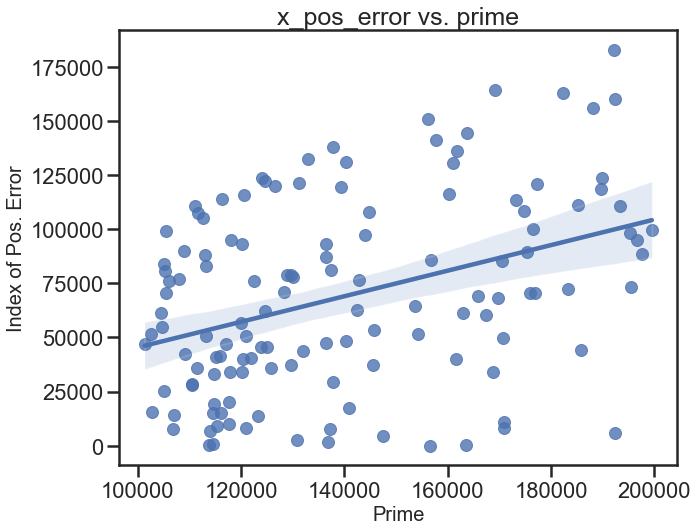

In [72]:
scatter("x_pos_error", df = df[df["prime"] < 200000], title = "x_pos_error vs. prime")

No massive trends here but definitely positive association

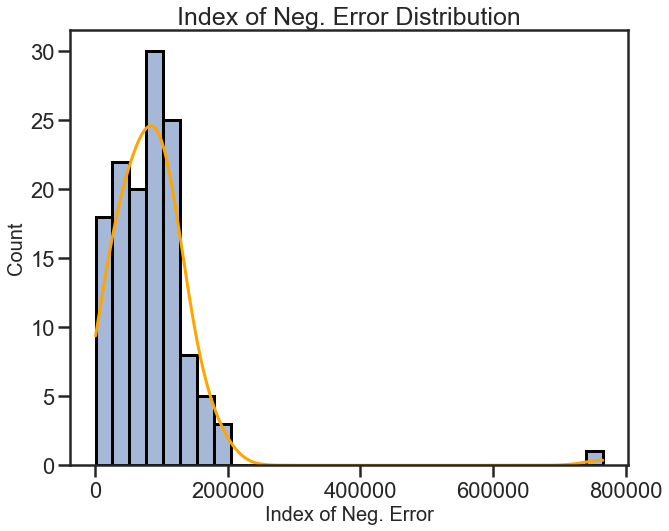

In [ ]:
histplot("x_neg_error")

Definitely here we see for larger primes, the neg error max seems to come towards the end (closer to p). We'll look at this more thoroughly later 

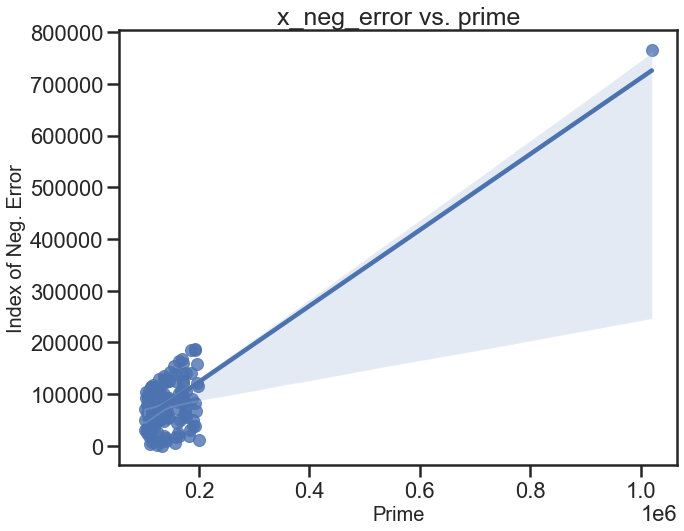

In [75]:
scatter("x_neg_error", title = "x_neg_error vs. prime")

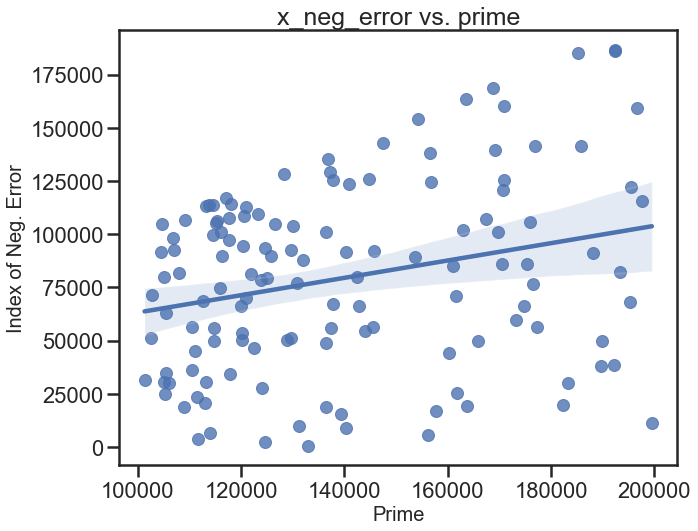

In [77]:
scatter("x_neg_error", df = df[df["prime"] < 200000], title = "x_neg_error vs. prime")

This looks almost identical to x pos error

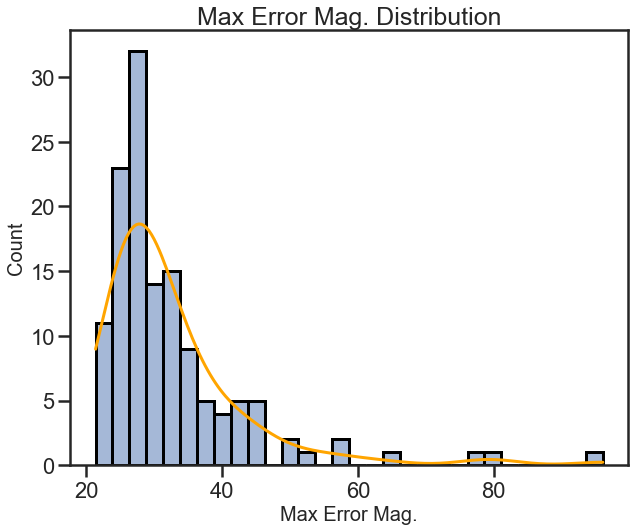

In [84]:
histplot('max_error')

Looks virtually like pos error

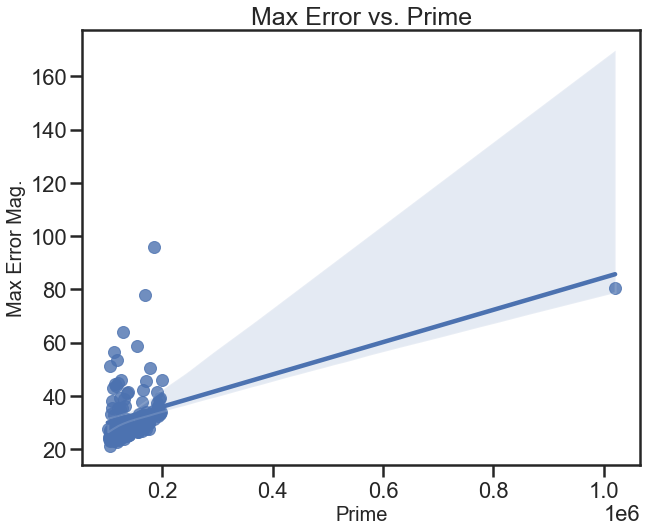

In [87]:
scatter("max_error", title = "Max Error vs. Prime")

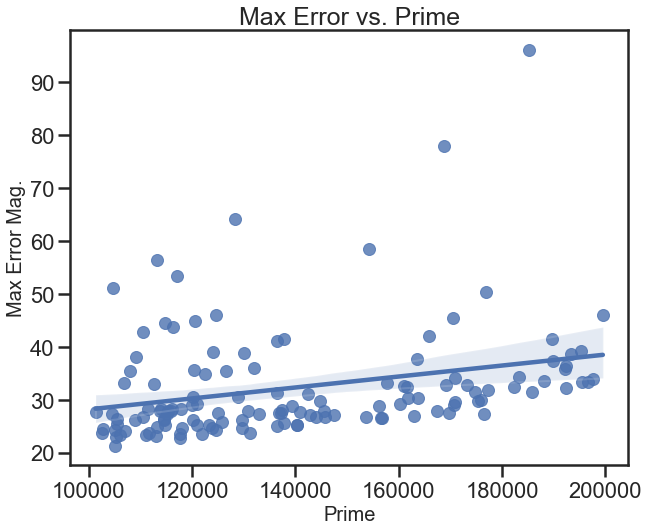

In [89]:
scatter("max_error", df = df[df["prime"] < 200000], title = "Max Error vs. Prime")

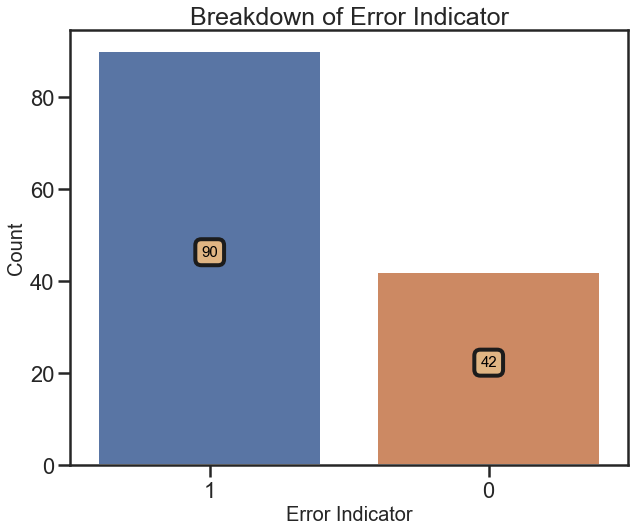

In [90]:
countplot("max_error_ind")

Most are pos > -1 * neg, but not all (roughly 2/3). Later I'll check if there's a correlation between prime and error ind

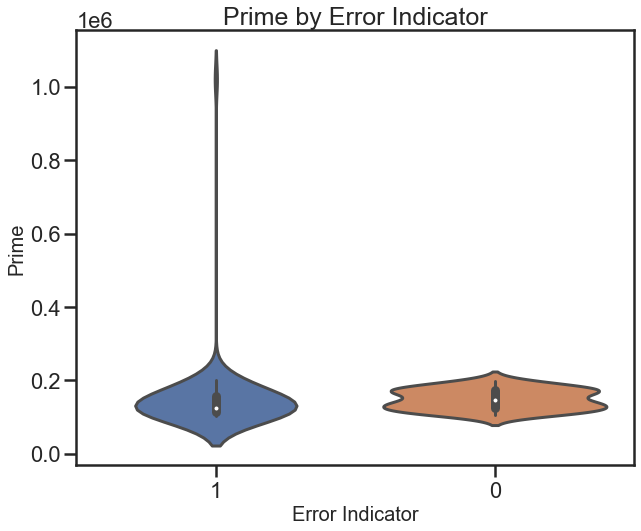

In [93]:
violinplot("max_error_ind", "prime")

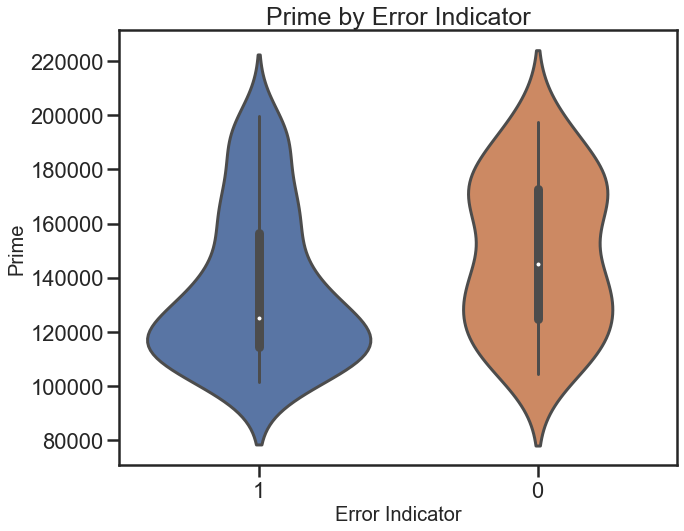

In [99]:
violinplot("max_error_ind", "prime", df = df[df["prime"] < 200000])

0 looks pretty symmetric and 1 also kinda does though not as much

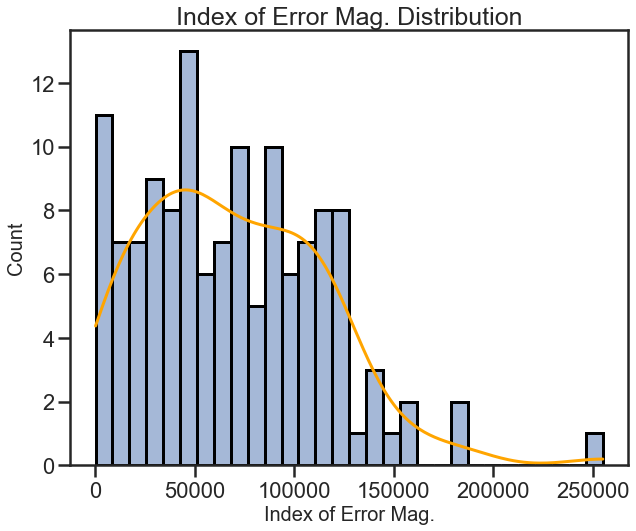

In [100]:
histplot("x_max_error")

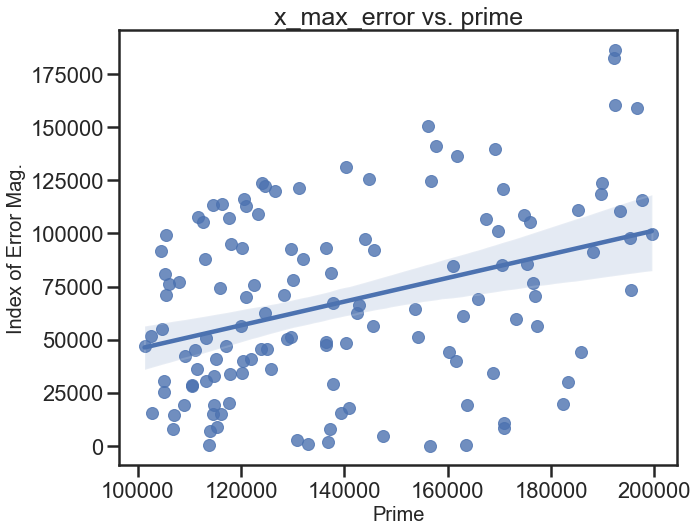

In [101]:
scatter("x_max_error", title = "x_max_error vs. prime", df = df[df["prime"] < 200000])

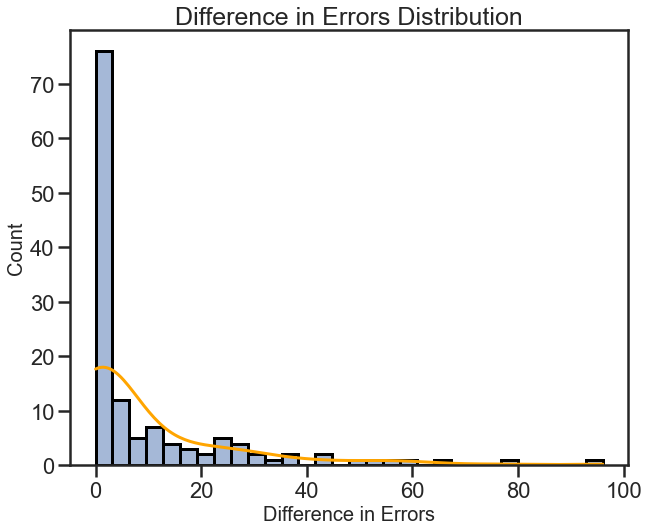

In [102]:
histplot("mag_diff")

Interestingly, a vast majority are very close to 0, and then the rest trail off. It's almost as if it's a binary 0 or not 0, and then for those that are not 0 there's a separate distribution

In [115]:
df[df["mag_diff"] < .08].sort_values("mag_diff")

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff
131,1020389,80.51,-80.51,255096,765290,80.51,1,255096,0.00
27,105037,24.32,-24.32,25175,79859,24.32,1,25175,0.00
122,137197,27.51,-27.51,7963,129231,27.51,1,7963,0.00
85,163621,37.71,-37.71,264,163354,37.71,1,264,0.00
82,111653,23.72,-23.72,107717,3933,23.72,1,107717,0.00
...,...,...,...,...,...,...,...,...,...
46,105601,26.28,-26.22,70771,34827,26.28,1,70771,0.06
24,173209,32.69,-32.76,113381,59825,32.76,0,59825,0.07
127,117709,23.62,-23.55,20274,97432,23.62,1,20274,0.07
33,129733,24.59,-24.66,78657,51073,24.66,0,51073,0.07


There are 63 points with the mag diff within .08!

In [116]:
get_length = lambda cutoff : len(df[df["mag_diff"] < cutoff])

for cutoff in [.01, .05, .08, 1, 2, 5, 10]:
    print(f"Cutoff: {round(cutoff, 2)}, Length: {get_length(cutoff)}")

Cutoff: 0.01, Length: 9
Cutoff: 0.05, Length: 52
Cutoff: 0.08, Length: 63
Cutoff: 1, Length: 70
Cutoff: 2, Length: 73
Cutoff: 5, Length: 82
Cutoff: 10, Length: 93


More than 80 of the 130ish are within 5

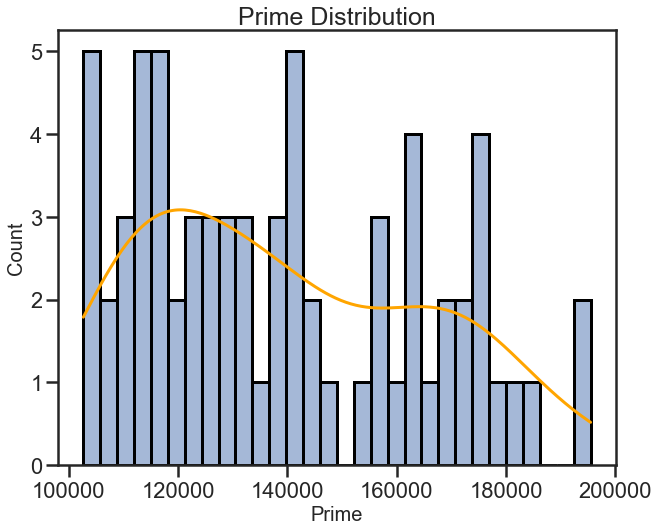

In [118]:
histplot('prime', df = df[(df["mag_diff"] < 1) & (df["prime"] < 200000)])

Seems pretty random when this phenomena occurs, but maybe that's just due to the short interval. I think if more 1 million primes have this property it could be worthwhile to look into

In [144]:
df_close = df[df["mag_diff"] < .08]

def check_dist(prime, x_pos_error, x_neg_error):
    # it seems x_pos, x_neg are centered around prime // 2
    prime = int(prime)
    x_pos_error = float(x_pos_error)
    x_neg_error = float(x_neg_error)
    max_x = max(x_pos_error, x_neg_error)
    min_x = min(x_pos_error, x_neg_error)
    dist1 = max_x - prime // 2
    dist2 = prime / 2 - min_x
    return abs(dist1 - dist2)

df["dist_check"] = np.vectorize(check_dist)(df["prime"], df["x_pos_error"], df["x_neg_error"])
names["dist_check"] = "Distance Checker"

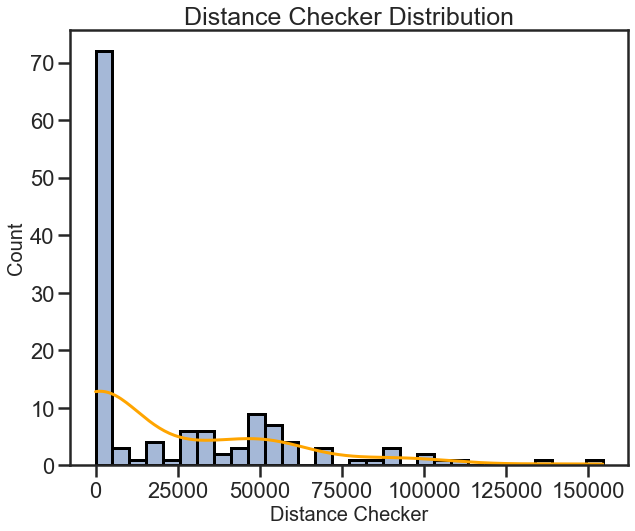

In [145]:
histplot('dist_check')

This is really interesting...

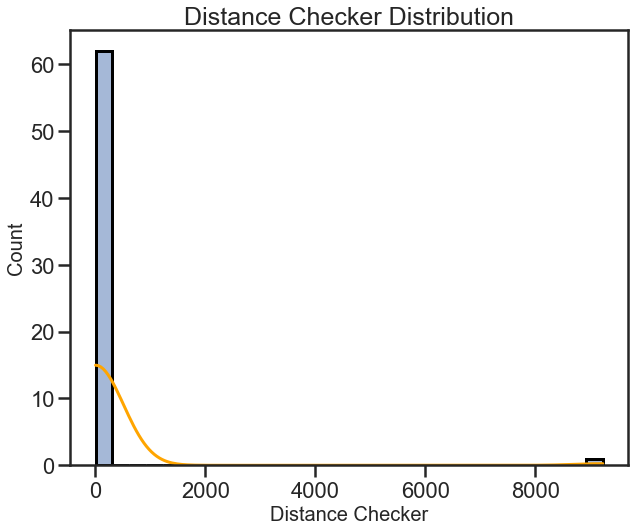

In [146]:
histplot("dist_check", df = df[df["mag_diff"] < .08])

In [149]:
df[df["mag_diff"] < .08]["dist_check"].sort_values()

123       2.5
54        2.5
94        2.5
110       2.5
117       2.5
        ...  
130       2.5
1         2.5
126       2.5
131       2.5
44     9225.5
Name: dist_check, Length: 63, dtype: float64

All 2.5 for some weird reason.

In [153]:
df[df["mag_diff"] < .08].sort_values("dist_check").tail(1)

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff,dist_check
44,105097,21.34,-21.35,83721,30601,21.35,0,30601,0.01,9225.5


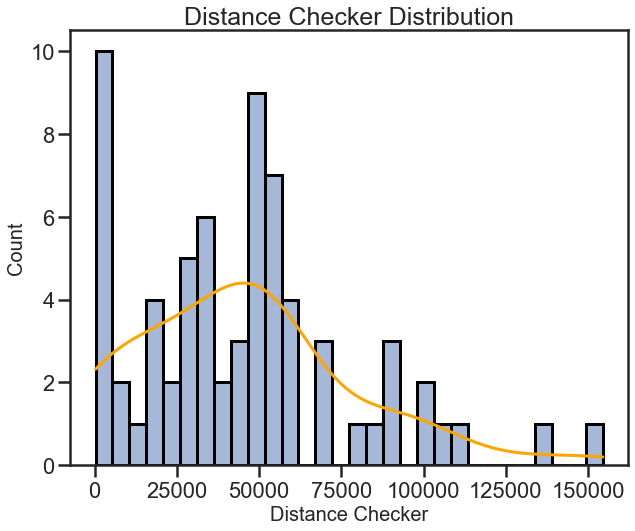

In [154]:
histplot("dist_check", df = df[df["mag_diff"] > .08])

Much simpler looking. Maybe still correlation between dist check and mag diff beyond .08 indicator 

In [164]:
df[df["dist_check"] <= 10000].sort_values("mag_diff")

,prime,pos_error,neg_error,x_pos_error,x_neg_error,max_error,max_error_ind,x_max_error,mag_diff,dist_check
131,1020389,80.51,-80.51,255096,765290,80.51,1,255096,0.00,2.5
82,111653,23.72,-23.72,107717,3933,23.72,1,107717,0.00,2.5
61,161729,30.27,-30.27,136335,25391,30.27,1,136335,0.00,2.5
85,163621,37.71,-37.71,264,163354,37.71,1,264,0.00,2.5
122,137197,27.51,-27.51,7963,129231,27.51,1,7963,0.00,2.5
...,...,...,...,...,...,...,...,...,...,...
104,114643,20.27,-26.29,840,113540,26.29,0,113540,6.02,262.5
105,193367,38.71,-19.50,110691,82321,38.71,1,110691,19.21,354.5
75,106859,33.10,-12.53,7820,98099,33.10,1,7820,20.57,939.5
7,122611,34.93,-11.77,75862,46294,34.93,1,75862,23.16,454.5


Yup, there is. Not really sure why but interesting

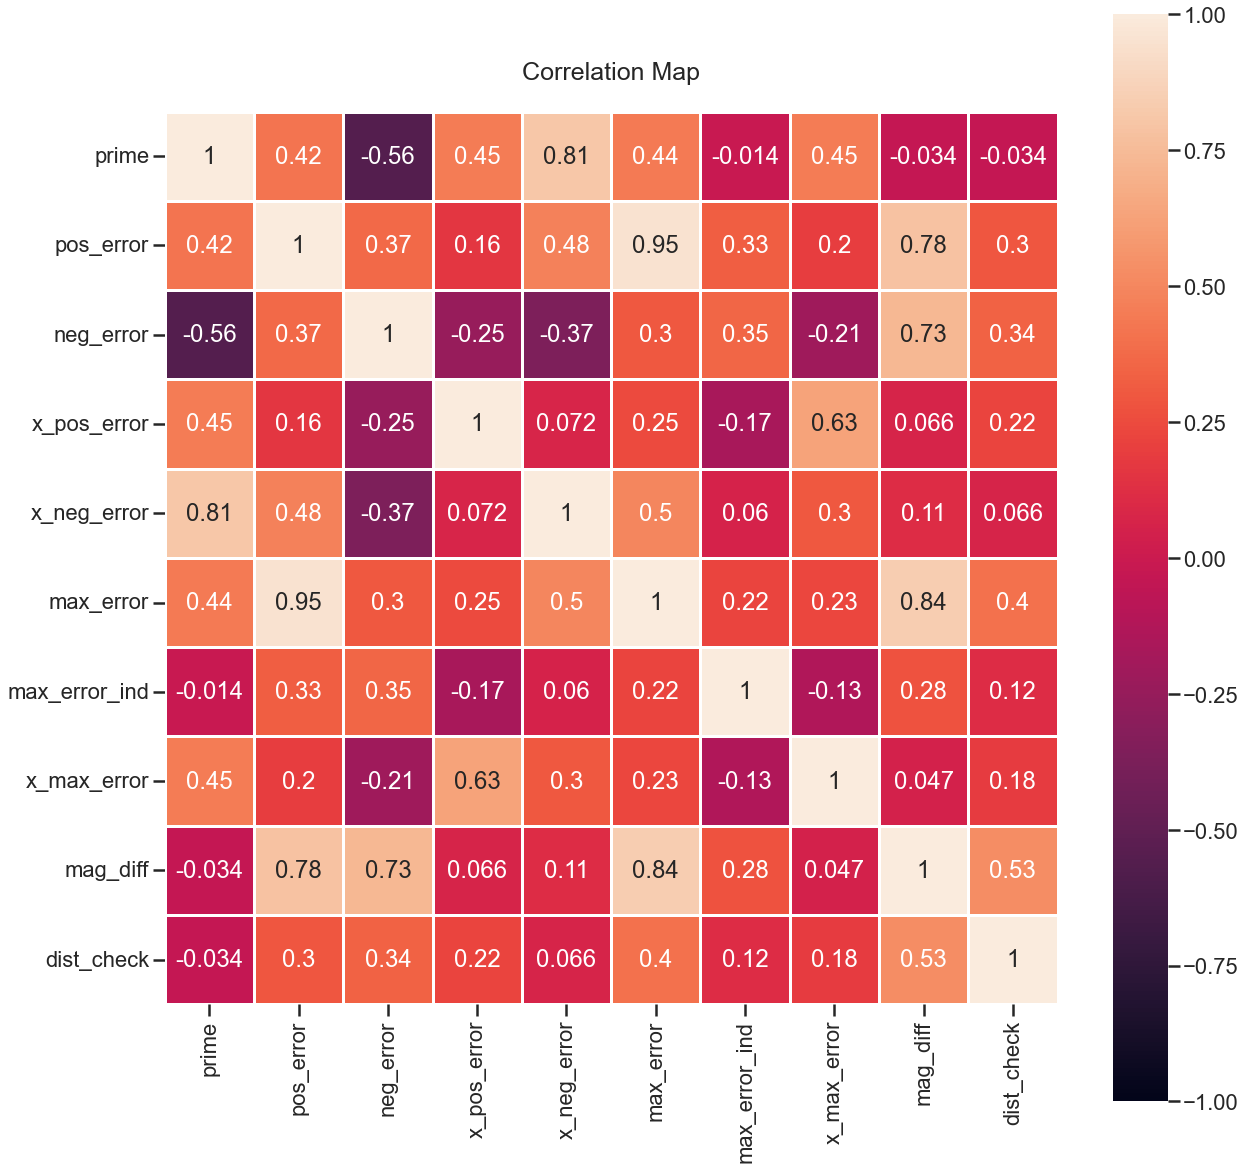

In [168]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), square = True, annot = True,
           vmin = -1, vmax = 1, linewidths = 3)

plt.title("Correlation Map\n", fontsize = 25)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()